Task: Predictive Modelling Using Data from Indian Startup Funding
Develop an advanced machine-learning model that forecasts funding for
Indian startups based on key dataset features such as funding dates,
industry verticals, locations, and amounts. Begin by precisely cleaning
the data, then engineer features that capture trends and conduct a
focused exploratory analysis. Experiment with advanced feature
combinations and regression algorithms that are tailored to the
challenges of the dataset. Optimise hyperparameters, add custom metrics and create
visualizations to show predictions and feature impacts.
Discuss deployment challenges and concerns about ethics.

Dataset Link:https://www.kaggle.com/datasets/sudalairajkumar/indian-startup-
funding/data

A. Questions for Analysis:
1. Which industries have a high correlation with increased funding
amounts?
2. Can funding patterns be related to economic trends?
3. What effect do different city locations have on startup funding?
4. Are there different types of investors associated with larger funding
rounds?
5. What factors are most important in making accurate funding
predictions?

B. Ideas for Visualisation:
1. A time series plot of funding amounts over the dataset period.
2. A bubble chart displaying funding amounts by industry and location.
3. A heatmap of feature correlations.
4. A visualization of the investor network highlighting common investors
in multiple startups.
5. A geospatial map highlighting the distribution of funding across



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [5]:
# Load the dataset
df = pd.read_csv("startup_funding.csv")

In [6]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [8]:
df.rename(columns = {'Date dd/mm/yyyy':'Date'}, inplace=True)

In [9]:
#correcting the value at 192 position in Date column
#As while converting it into date time format, got an error
#Because date was in "05/072018" this format, hence corrected it.

df.loc[192,'Date'] = '05/07/2018'


In [10]:
#Using errors = coerce because while converting it to data time format, got an error
#OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 15-01-07 00:00:00 present at position 875
#Therefore errors = coerce will handle/replace any values that cannot be converted to valid timestamps to NAT(not a time)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

/var/folders/z6/40r9qmyn6d9cft3g1q1nwvdw0000gn/T/ipykernel_7987/4224872194.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [11]:
df.drop(columns = ['Remarks'],inplace = True)

In [12]:
df['Investors Name'] = df['Investors Name'].fillna('Undisclosed')

In [13]:
df.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [14]:
df.rename(columns = {
    'Date':'date',
    'Startup Name':'startup',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'Investors Name':'investors',
    'InvestmentnType':'round',
    'Amount in USD':'amount',
    '':''
},inplace = True)


In [15]:
df['amount'] = df['amount'].fillna('0')

In [16]:
df['amount'] = df['amount'].str.replace(',','')
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')

In [17]:
df = df.dropna(subset = ['date','city','vertical','startup','investors','round','amount'])

In [18]:
df.head()

,Sr No,date,startup,vertical,subvertical,city,investors,round,amount
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2858 entries, 0 to 2872
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sr No        2858 non-null   int64         
 1   date         2858 non-null   datetime64[ns]
 2   startup      2858 non-null   object        
 3   vertical     2858 non-null   object        
 4   subvertical  2098 non-null   object        
 5   city         2858 non-null   object        
 6   investors    2858 non-null   object        
 7   round        2858 non-null   object        
 8   amount       2858 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 223.3+ KB


In [20]:
df = df[df['amount'].str.isdigit()]

In [21]:
df['amount'] = df['amount'].astype('float')

In [22]:
def to_inr(dollar):
    inr = dollar * 82.5
    return inr/10000000

In [23]:
df['amount'] = df['amount'].apply(to_inr)

In [24]:
df['amount']

0       1650.000000
1         66.399250
2        151.460595
3         24.750000
4         14.850000
           ...     
2868      28.875000
2869       0.000000
2870       3.300000
2871       4.125000
2872      66.000000
Name: amount, Length: 2846, dtype: float64

In [25]:
df['year'] = df['date'].dt.year

In [26]:
df['month'] = df['date'].dt.month

In [32]:
df.to_csv('start_clean.csv',index = False)

In [27]:
df_1 = df

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [49]:
# Assuming 'data' is your DataFrame with relevant features and target variable
X = df_1.drop(columns=['amount', 'date', 'startup', 'round','Sr No'],axis=1)  # Features
y = df_1['amount']  # Target variable

In [50]:
# Apply label encoding to categorical columns
label_encoder = LabelEncoder()


for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [53]:
# Get feature importances
feature_importance = model.feature_importances_


In [54]:
# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})


In [55]:
# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [56]:
feature_importance_df

,Feature,Importance
3,investors,0.676307
0,vertical,0.094227
1,subvertical,0.087263
4,year,0.059297
5,month,0.047007
2,city,0.035899


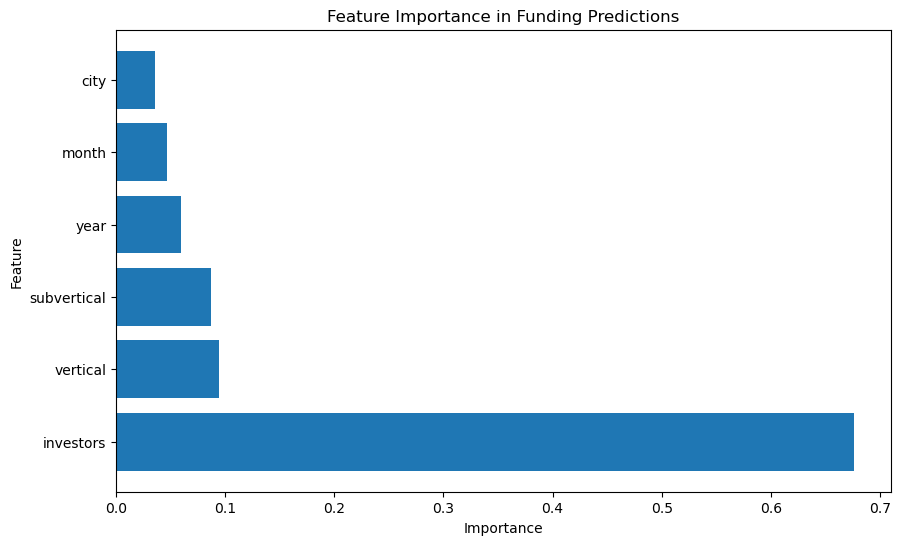

In [57]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance in Funding Predictions')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
1.Which industries have a high correlation with increased funding amounts?

A:

In [48]:
# Calculate correlation between industry and funding amount
industry_corr = df.groupby('vertical')['amount'].mean().sort_values(ascending=False)
industry_corr

vertical
Transportation                                8078.054313
E-Commerce & M-Commerce platform              5610.000000
Ecommerce Marketplace                         4125.000000
Car Aggregator & Retail Mobile App            4125.000000
Cab Aggregator                                3300.000000
                                                 ...     
Railways Information Mobile app                  0.000000
Content Management Software Solutions            0.000000
Content Discovery & reward points platform       0.000000
Consumer lending marketplace                     0.000000
360-degree view creating platform                0.000000
Name: amount, Length: 806, dtype: float64

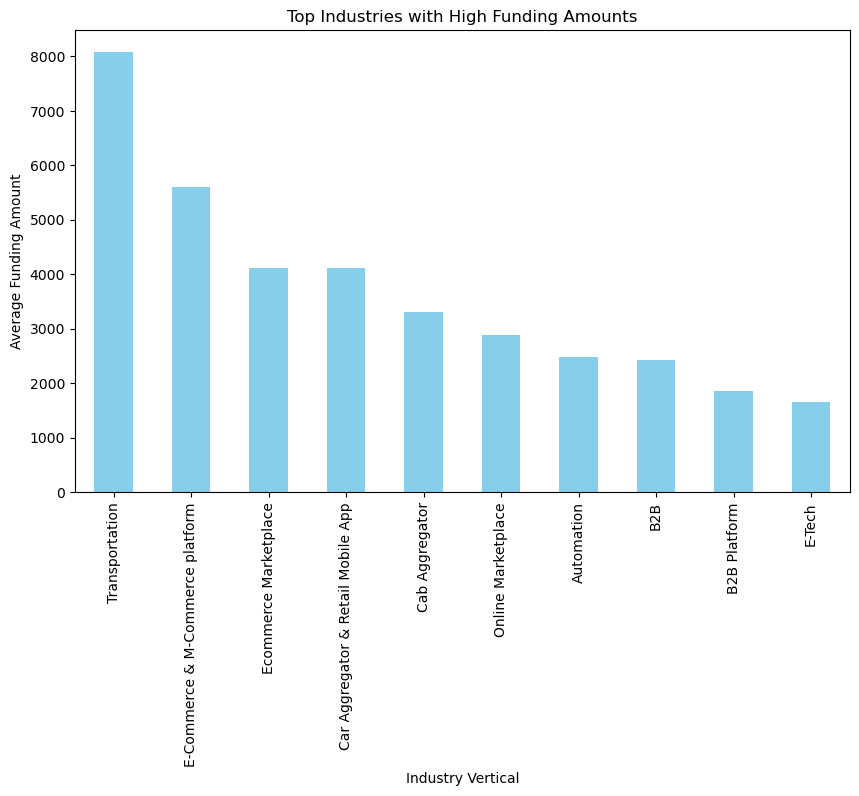

In [49]:
# Calculate correlation between industry and funding amount
industry_corr = df.groupby('vertical')['amount'].mean().sort_values(ascending=False)

# Visualize the top industries
plt.figure(figsize=(10, 6))
industry_corr.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Industries with High Funding Amounts')
plt.xlabel('Industry Vertical')
plt.ylabel('Average Funding Amount')
plt.show()

In [59]:
yearly_funding = df.groupby('year')['amount'].sum().reset_index()
yearly_funding

,year,amount
0,2015,60462.154500
1,2016,31581.297891
2,2017,86041.805273
3,2018,42259.539044
4,2019,78076.663706
5,2020,3219.209846


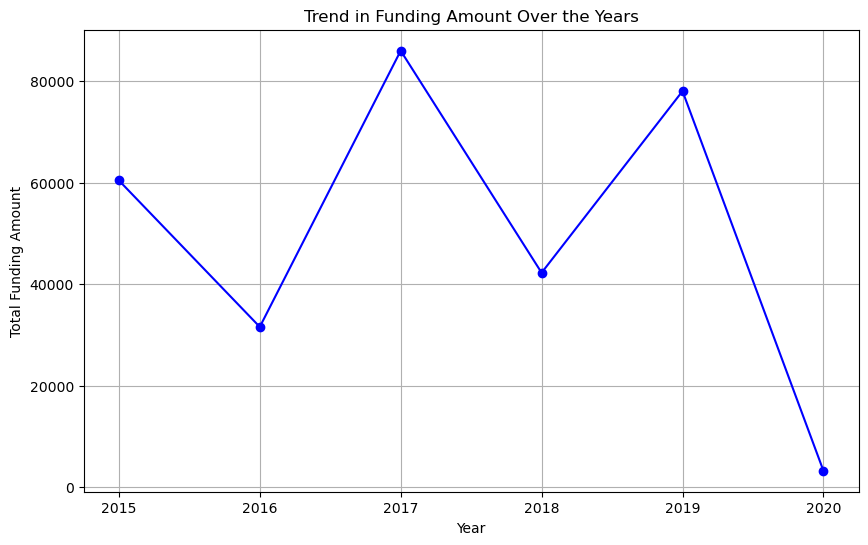

In [47]:
# Plot the trend using a line plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_funding['year'], yearly_funding['amount'], marker='o', linestyle='-', color='b')
plt.title('Trend in Funding Amount Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.grid(True)
plt.show()

In [50]:
# Calculate average funding amounts by city
city_funding_avg = df.groupby('city')['amount'].mean().sort_values(ascending=False)
city_funding_avg

city
Menlo Park            3712.50
California            2475.00
India/Singapore       1864.50
Kormangala            1171.50
San Jose,             1113.75
                       ...   
Goa/Hyderabad            0.00
Chennai/ Singapore       0.00
Bhubaneswar              0.00
Ahemdabad                0.00
Kochi                    0.00
Name: amount, Length: 105, dtype: float64

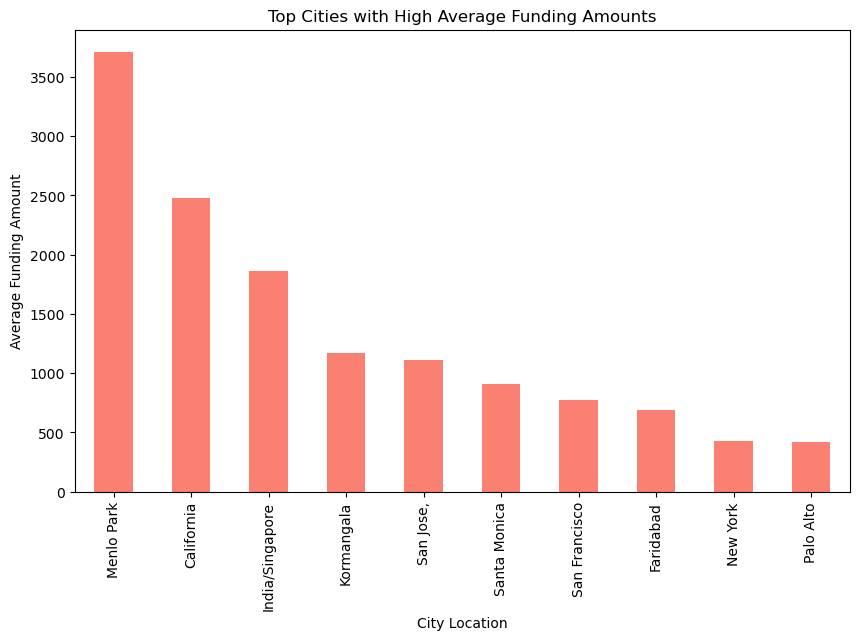

In [51]:
# Calculate average funding amounts by city
city_funding_avg = df.groupby('city')['amount'].mean().sort_values(ascending=False)

# Visualize the top cities
plt.figure(figsize=(10, 6))
city_funding_avg.head(10).plot(kind='bar', color='salmon')
plt.title('Top Cities with High Average Funding Amounts')
plt.xlabel('City Location')
plt.ylabel('Average Funding Amount')
plt.show()


In [60]:
# Assuming you have an investor type column named 'investor_type'
investor_type_avg = df.groupby('investors')['amount'].mean().sort_values(ascending=False)
investor_type_avg

investors
Westbridge Capital                                                                                         32175.00
Softbank                                                                                                   20625.00
Microsoft, eBay, Tencent Holdings                                                                          11550.00
SoftBank Group                                                                                              6030.75
Steadview Capital and existing investors                                                                    5775.00
                                                                                                             ...   
Kae Capital Management, Nazara Technologies                                                                    0.00
Kae Capital Management                                                                                         0.00
KDDI\\xc2\\xa0                                                

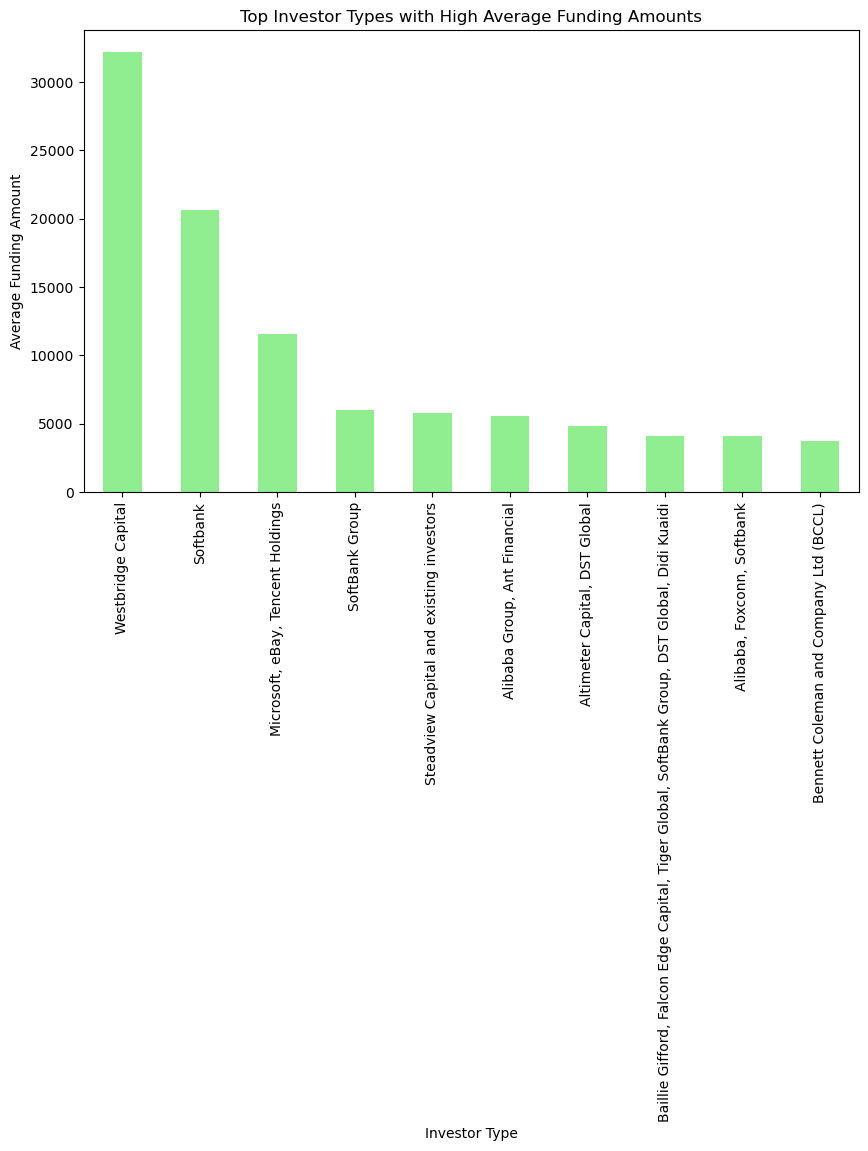

In [52]:
# Assuming you have an investor type column named 'investor_type'
investor_type_avg = df.groupby('investors')['amount'].mean().sort_values(ascending=False)

# Visualize the top investor types
plt.figure(figsize=(10, 6))
investor_type_avg.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top Investor Types with High Average Funding Amounts')
plt.xlabel('Investor Type')
plt.ylabel('Average Funding Amount')
plt.show()


B:

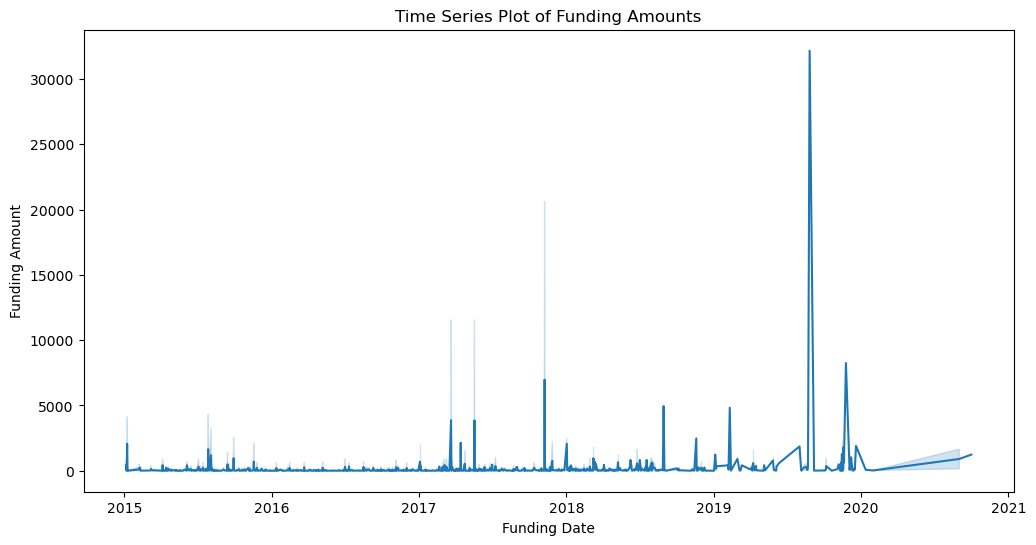

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='amount', data=df)
plt.title('Time Series Plot of Funding Amounts')
plt.xlabel('Funding Date')
plt.ylabel('Funding Amount')
plt.show()


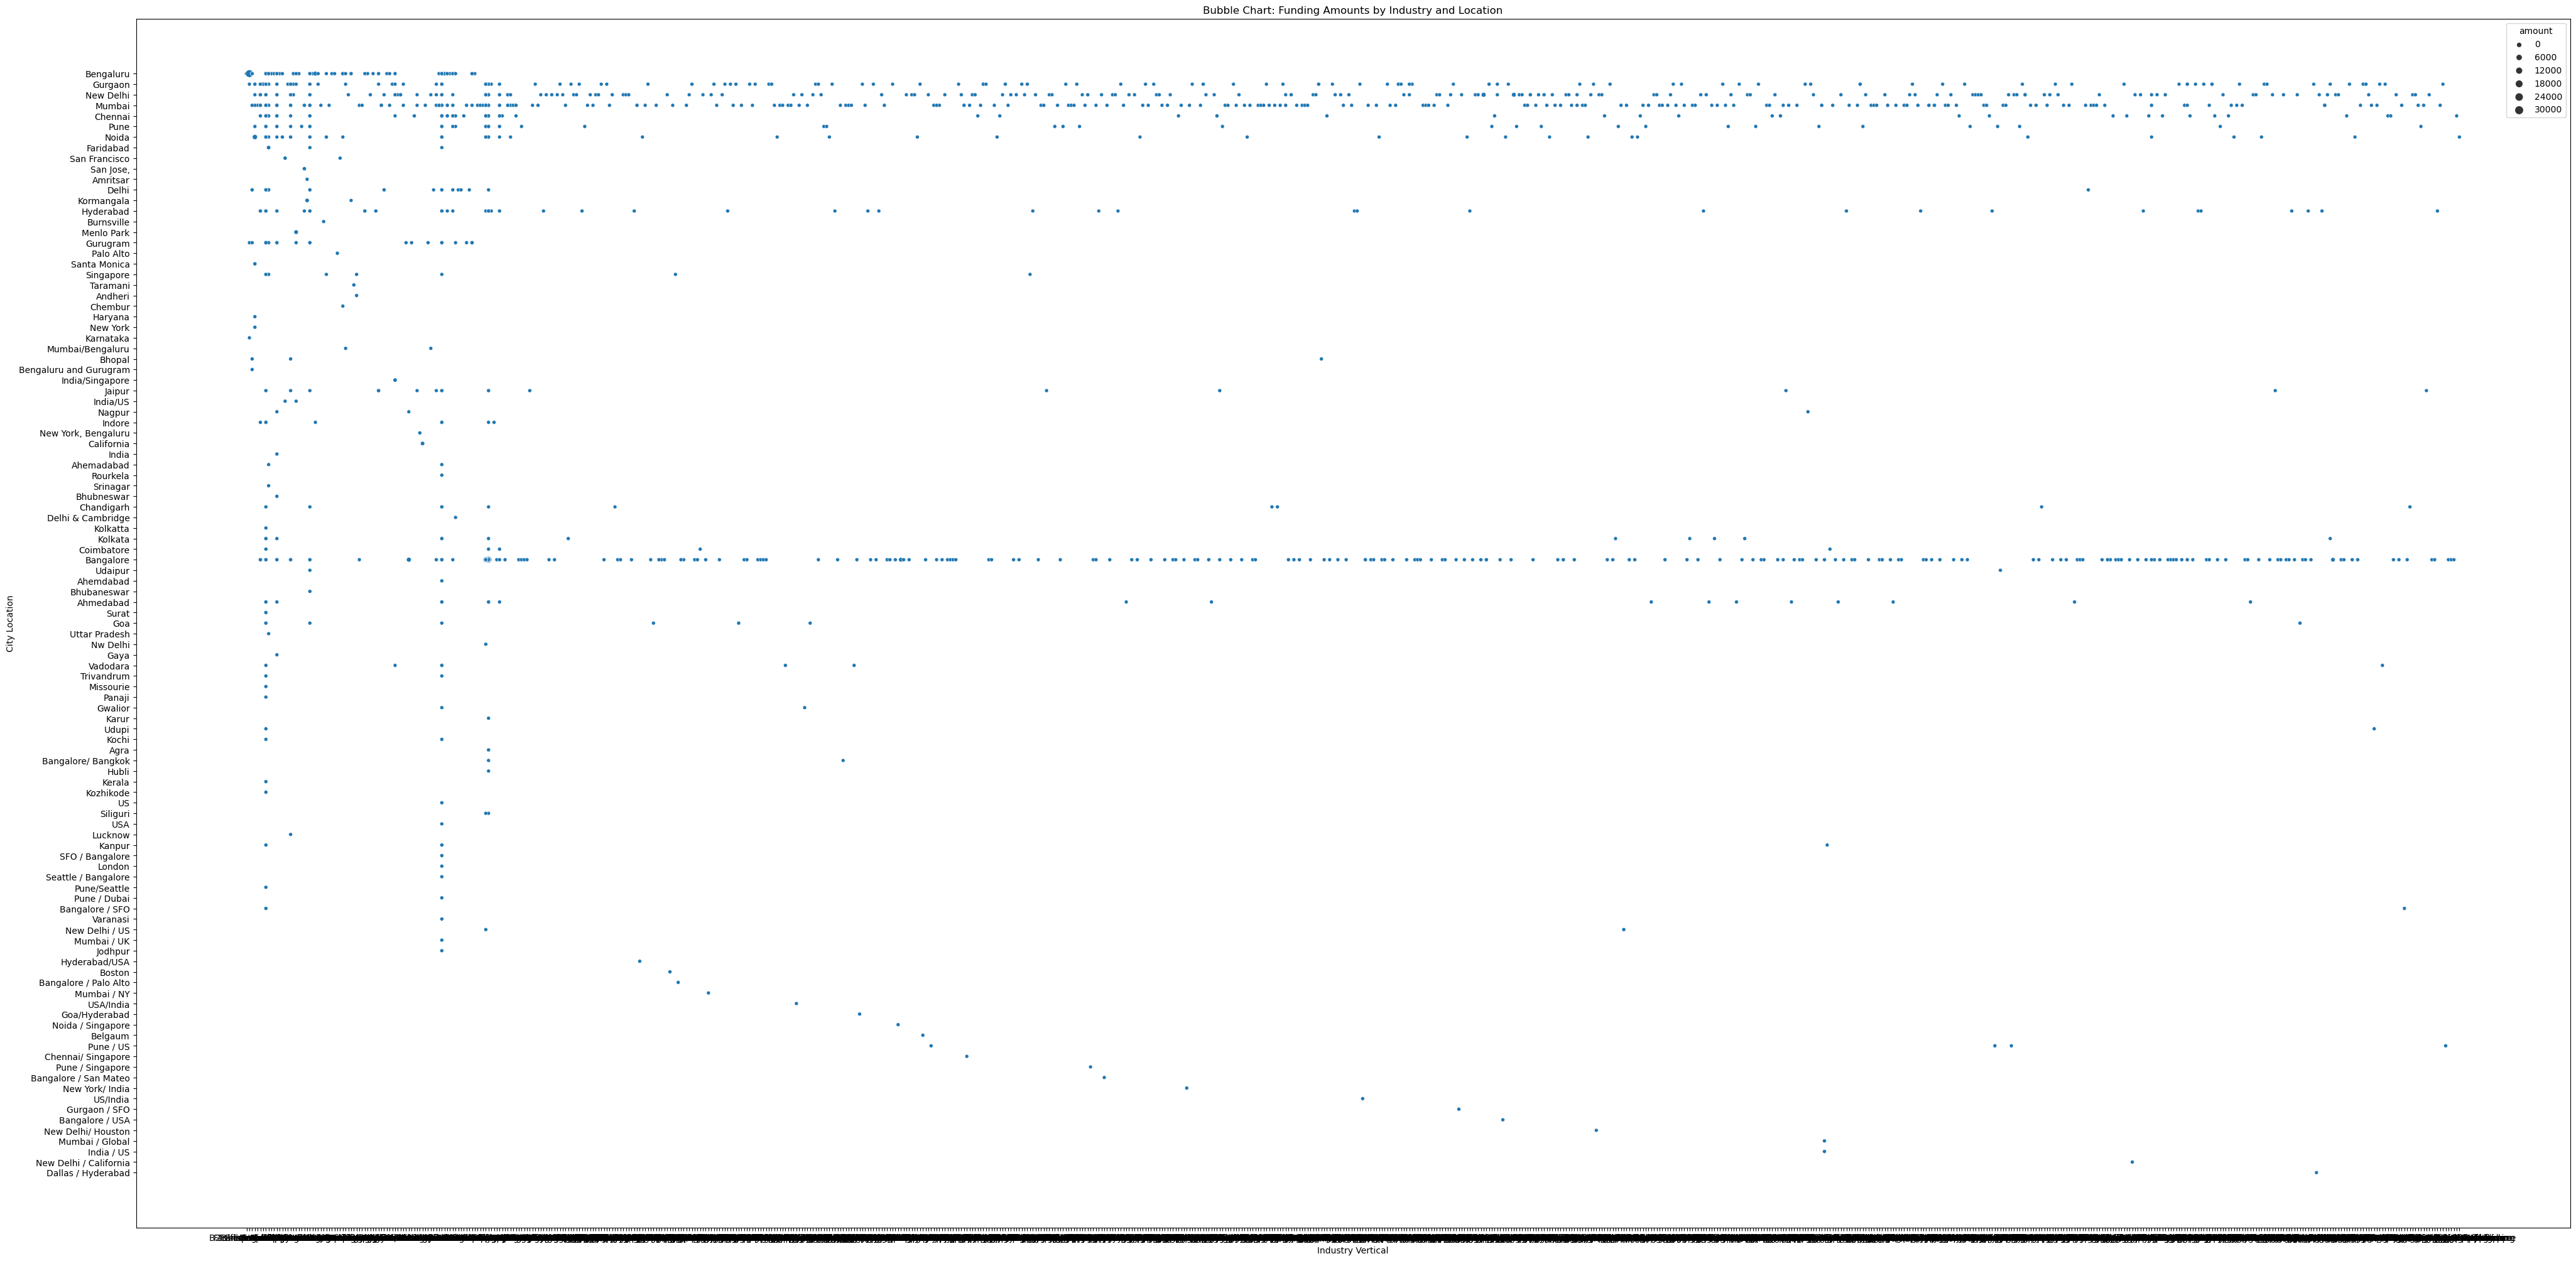

In [57]:
plt.figure(figsize=(50, 25))
sns.scatterplot(x='vertical', y='city', size='amount', data=df)
plt.title('Bubble Chart: Funding Amounts by Industry and Location')
plt.xlabel('Industry Vertical')
plt.ylabel('City Location')
plt.show()


/var/folders/z6/40r9qmyn6d9cft3g1q1nwvdw0000gn/T/ipykernel_6449/4171005797.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


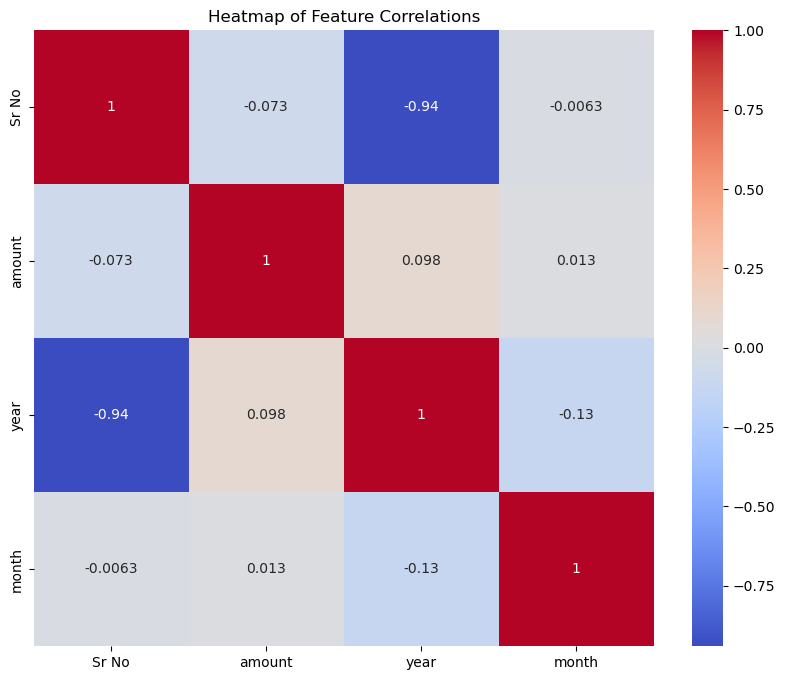

In [55]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()


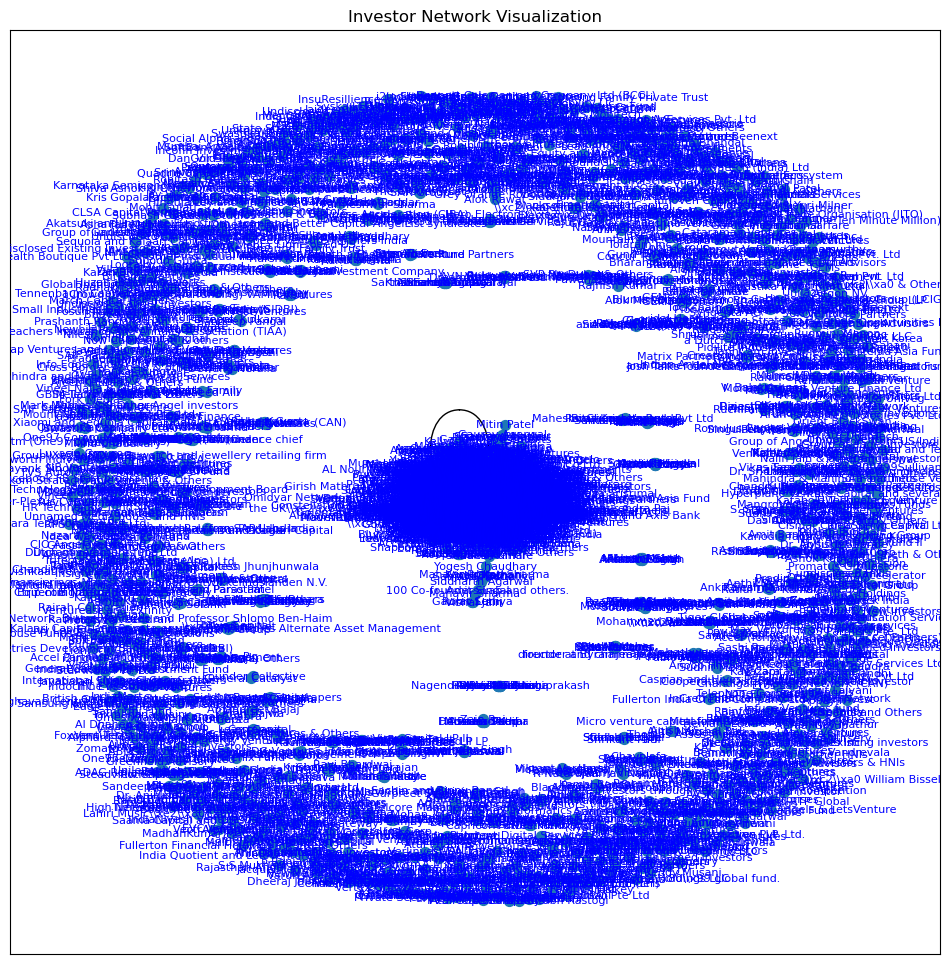

In [58]:
# Assuming you have a network graph library like NetworkX installed
import networkx as nx

investor_network = nx.Graph()

for _, row in df.iterrows():
    investors = row['investors'].split(',')
    for i in investors:
        investor_network.add_node(i.strip())

    # Connect common investors
    for i in investors:
        for j in investors:
            if i != j:
                if investor_network.has_edge(i.strip(), j.strip()):
                    investor_network[i.strip()][j.strip()]['weight'] += 1
                else:
                    investor_network.add_edge(i.strip(), j.strip(), weight=1)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(investor_network)
nx.draw_networkx(investor_network, pos, with_labels=True, font_size=8, node_size=50, font_color='blue')
plt.title('Investor Network Visualization')
plt.show()


In [61]:
city = df['city']

In [62]:
cleaned_city1 = [name.strip() for c in city for name in c.replace('/', ',').replace('&', '').replace(' and ', ',').split(',')]

# Remove empty strings
cleaned_city1 = list(filter(None, cleaned_city1))

# Display the cleaned city list
cleaned_city1

['Bengaluru',
 'Gurgaon',
 'Bengaluru',
 'New Delhi',
 'Mumbai',
 'Chennai',
 'Gurgaon',
 'Pune',
 'Gurgaon',
 'Bengaluru',
 'Gurgaon',
 'Bengaluru',
 'Bengaluru',
 'Mumbai',
 'Bengaluru',
 'Noida',
 'Faridabad',
 'San Francisco',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Bengaluru',
 'Gurgaon',
 'Pune',
 'San Jose',
 'Amritsar',
 'Delhi',
 'Mumbai',
 'Kormangala',
 'Noida',
 'Bengaluru',
 'Bengaluru',
 'Gurgaon',
 'Pune',
 'Mumbai',
 'Mumbai',
 'Hyderabad',
 'Burnsville',
 'Bengaluru',
 'Mumbai',
 'Menlo Park',
 'Bengaluru',
 'Gurgaon',
 'New Delhi',
 'Bengaluru',
 'Mumbai',
 'Noida',
 'Bengaluru',
 'Gurugram',
 'Palo Alto',
 'San Francisco',
 'Bengaluru',
 'Santa Monica',
 'Gurgaon',
 'Bengaluru',
 'Noida',
 'Gurgaon',
 'Gurgaon',
 'Bengaluru',
 'Gurgaon',
 'Singapore',
 'New Delhi',
 'Kormangala',
 'Taramani',
 'New Delhi',
 'Bengaluru',
 'Singapore',
 'Singapore',
 'Andheri',
 'Mumbai',
 'Mumbai',
 'Chembur',
 'Bengaluru',
 'New Delhi',
 'Bengaluru',
 'New Delhi',
 'Hyderab

In [63]:
!pip install fuzzywuzzy

In [64]:
from fuzzywuzzy import process

# Assuming 'city' is your list of cities

# List of correct city names
correct_cities = ['Agra', 'Ahmedabad', 'Amritsar', 'Andheri', 'Bangalore', 'Belgaum', 'Bengaluru', 'Bhopal', 'Bhubaneswar', 'Boston', 'Burnsville',
                  'California', 'Chandigarh', 'Chembur', 'Chennai', 'Coimbatore', 'Dallas', 'Delhi', 'Faridabad', 'Gaya', 'Goa', 'Gurgaon', 'Gurugram',
                  'Gwalior', 'Haryana', 'Hubli', 'Hyderabad', 'India', 'Indore', 'Jaipur', 'Jodhpur', 'Kanpur', 'Karnataka', 'Karur', 'Kerala', 'Kochi',
                  'Kolkata', 'Kozhikode', 'London', 'Lucknow', 'Menlo Park', 'Missouri', 'Mumbai', 'Nagpur', 'New Delhi', 'New York', 'Noida', 'Palo Alto',
                  'Panaji', 'Pune', 'Rourkela', 'San Francisco', 'San Jose', 'Santa Monica', 'Seattle', 'Siliguri', 'Singapore', 'Srinagar', 'Surat', 'Taramani',
                  'Trivandrum', 'Udaipur', 'Udupi', 'Uttar Pradesh', 'Vadodara', 'Varanasi']

# Find best matches for each city
cleaned_city = [process.extractOne(c, correct_cities)[0] for c in cleaned_city1]

# Display the cleaned city list
print(cleaned_city)


/Users/pratik/anaconda3/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


['Bengaluru', 'Gurgaon', 'Bengaluru', 'New Delhi', 'Mumbai', 'Chennai', 'Gurgaon', 'Pune', 'Gurgaon', 'Bengaluru', 'Gurgaon', 'Bengaluru', 'Bengaluru', 'Mumbai', 'Bengaluru', 'Noida', 'Faridabad', 'San Francisco', 'Gurgaon', 'Gurgaon', 'Gurgaon', 'Gurgaon', 'Bengaluru', 'Gurgaon', 'Pune', 'San Jose', 'Amritsar', 'Delhi', 'Mumbai', 'Agra', 'Noida', 'Bengaluru', 'Bengaluru', 'Gurgaon', 'Pune', 'Mumbai', 'Mumbai', 'Hyderabad', 'Burnsville', 'Bengaluru', 'Mumbai', 'Menlo Park', 'Bengaluru', 'Gurgaon', 'New Delhi', 'Bengaluru', 'Mumbai', 'Noida', 'Bengaluru', 'Gurugram', 'Palo Alto', 'San Francisco', 'Bengaluru', 'Santa Monica', 'Gurgaon', 'Bengaluru', 'Noida', 'Gurgaon', 'Gurgaon', 'Bengaluru', 'Gurgaon', 'Singapore', 'New Delhi', 'Agra', 'Taramani', 'New Delhi', 'Bengaluru', 'Singapore', 'Singapore', 'Andheri', 'Mumbai', 'Mumbai', 'Chembur', 'Bengaluru', 'New Delhi', 'Bengaluru', 'New Delhi', 'Hyderabad', 'Bengaluru', 'New Delhi', 'Bengaluru', 'Haryana', 'New York', 'Karnataka', 'Mumbai',

In [65]:
cleaned_city

['Bengaluru',
 'Gurgaon',
 'Bengaluru',
 'New Delhi',
 'Mumbai',
 'Chennai',
 'Gurgaon',
 'Pune',
 'Gurgaon',
 'Bengaluru',
 'Gurgaon',
 'Bengaluru',
 'Bengaluru',
 'Mumbai',
 'Bengaluru',
 'Noida',
 'Faridabad',
 'San Francisco',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Bengaluru',
 'Gurgaon',
 'Pune',
 'San Jose',
 'Amritsar',
 'Delhi',
 'Mumbai',
 'Agra',
 'Noida',
 'Bengaluru',
 'Bengaluru',
 'Gurgaon',
 'Pune',
 'Mumbai',
 'Mumbai',
 'Hyderabad',
 'Burnsville',
 'Bengaluru',
 'Mumbai',
 'Menlo Park',
 'Bengaluru',
 'Gurgaon',
 'New Delhi',
 'Bengaluru',
 'Mumbai',
 'Noida',
 'Bengaluru',
 'Gurugram',
 'Palo Alto',
 'San Francisco',
 'Bengaluru',
 'Santa Monica',
 'Gurgaon',
 'Bengaluru',
 'Noida',
 'Gurgaon',
 'Gurgaon',
 'Bengaluru',
 'Gurgaon',
 'Singapore',
 'New Delhi',
 'Agra',
 'Taramani',
 'New Delhi',
 'Bengaluru',
 'Singapore',
 'Singapore',
 'Andheri',
 'Mumbai',
 'Mumbai',
 'Chembur',
 'Bengaluru',
 'New Delhi',
 'Bengaluru',
 'New Delhi',
 'Hyderabad',
 'Benga

In [66]:
import pandas as pd
from geopy.geocoders import Nominatim

# List of cities
cities = ['Agra', 'Ahmedabad', 'Ahmedabad', 'Ahmedabad', 'Amritsar', 'Andheri', 'Bangalore', 'Bangalore', 'Palo Alto', 'Bangalore', 'Boston',
          'Bangalore', 'San Jose', 'Bangalore', 'Amritsar', 'Bangalore', 'Bangalore', 'Belgaum', 'Bengaluru', 'Bengaluru', 'Gurugram', 'Bhopal',
          'Bhubaneswar', 'Bhubaneswar', 'Boston', 'Burnsville', 'California', 'Chandigarh', 'Chembur', 'Chennai', 'Chennai', 'Singapore',
          'Coimbatore', 'Dallas', 'Hyderabad', 'Delhi', 'Delhi', 'Faridabad', 'Gaya', 'Goa', 'Goa', 'Hyderabad', 'Gurgaon', 'Gurgaon', 'Boston',
          'Gurugram', 'Gwalior', 'Haryana', 'Hubli', 'Hyderabad', 'Hyderabad', 'Amritsar', 'India', 'India', 'Amritsar', 'India', 'Singapore',
          'India', 'Amritsar', 'Indore', 'Jaipur', 'Jodhpur', 'Kanpur', 'Karnataka', 'Karur', 'Kerala', 'Kochi', 'Kolkata', 'Kolkata', 'Agra',
          'Kozhikode', 'London', 'Lucknow', 'Menlo Park', 'Missouri', 'Mumbai', 'Mumbai', 'Goa', 'Mumbai', 'Boston', 'Mumbai', 'Belgaum',
          'Mumbai', 'Bengaluru', 'Nagpur', 'New Delhi', 'New Delhi', 'California', 'New Delhi', 'Amritsar', 'New Delhi', 'Boston', 'New York',
          'New York', 'New York', 'India', 'Noida', 'Noida', 'Singapore', 'New Delhi', 'Palo Alto', 'Panaji', 'Pune', 'Pune', 'Mumbai', 'Pune',
          'Singapore', 'Pune', 'Amritsar', 'Pune', 'Seattle', 'Rourkela', 'Boston', 'Bangalore', 'San Francisco', 'San Jose', 'Santa Monica',
          'Seattle', 'Bangalore', 'Siliguri', 'Singapore', 'Srinagar', 'Surat', 'Taramani', 'Trivandrum', 'Amritsar', 'Amritsar', 'India', 'Amritsar',
          'Amritsar', 'India', 'Udaipur', 'Udupi', 'Uttar Pradesh', 'Vadodara', 'Varanasi']

# Create a DataFrame
data = pd.DataFrame({'City': cities})

# Initialize geolocator
geolocator = Nominatim(user_agent="city_locator")

# Function to get latitude and longitude
def get_lat_lon(city):
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Apply the function to get latitude and longitude for each city
data['Latitude'], data['Longitude'] = zip(*data['City'].apply(get_lat_lon))

# Display the DataFrame
print(data)


              City   Latitude  Longitude
0             Agra  27.175255  78.009816
1        Ahmedabad  23.021624  72.579707
2        Ahmedabad  23.021624  72.579707
3        Ahmedabad  23.021624  72.579707
4         Amritsar  31.634308  74.873679
..             ...        ...        ...
131        Udaipur  24.578721  73.686257
132          Udupi  13.341917  74.747323
133  Uttar Pradesh  27.130334  80.859666
134       Vadodara  22.297314  73.194257
135       Varanasi  25.335649  83.007629

[136 rows x 3 columns]


In [67]:
data

,City,Latitude,Longitude
0,Agra,27.175255,78.009816
1,Ahmedabad,23.021624,72.579707
2,Ahmedabad,23.021624,72.579707
3,Ahmedabad,23.021624,72.579707
4,Amritsar,31.634308,74.873679
...,...,...,...
131,Udaipur,24.578721,73.686257
132,Udupi,13.341917,74.747323
133,Uttar Pradesh,27.130334,80.859666
134,Vadodara,22.297314,73.194257


In [69]:
!pip install geopandas

/var/folders/z6/40r9qmyn6d9cft3g1q1nwvdw0000gn/T/ipykernel_7987/304391568.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


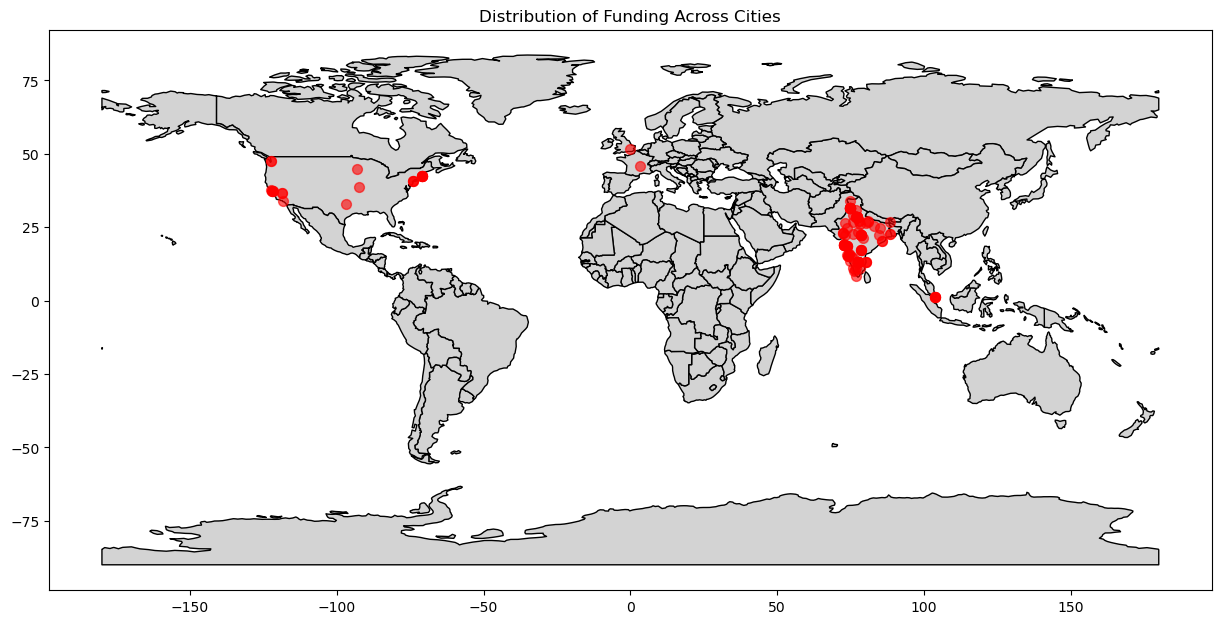

In [70]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load world countries shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))





# Create a GeoDataFrame for cities
geometry = gpd.points_from_xy(data['Longitude'], data['Latitude'])
cities = gpd.GeoDataFrame(data, geometry=geometry)

# Plot the world map
ax = world.plot(figsize=(15, 10), color='lightgrey', edgecolor='black')

# Plot the cities on top of the world map
cities.plot(ax=ax, color='red', marker='o', markersize=50, alpha=0.6)

# Show the plot
plt.title('Distribution of Funding Across Cities')
plt.show()
